In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

from rl_envs_forge.envs.labyrinth.labyrinth import Labyrinth
from rl_envs_forge.envs.labyrinth.mdp.mdp import LabyrinthMDP

from policy_iteration import find_optimal_policy, policy_iteration
from visualize import draw_gridworld

Optimal Policy: {(4, 0): 2, (4, 9): 0, (3, 7): 0, (5, 4): 0, (9, 2): 0, (5, 7): 2, (8, 0): 1, (0, 2): 1, (8, 3): 0, (8, 9): 3, (0, 5): 3, (2, 2): 1, (1, 0): 0, (8, 6): 3, (0, 8): 3, (2, 5): 0, (1, 3): 2, (1, 9): 0, (7, 7): 2, (4, 2): 1, (4, 5): 3, (3, 3): 2, (3, 9): 0, (5, 0): 2, (5, 3): 0, (8, 2): 1, (8, 5): 3, (9, 4): 0, (0, 1): 1, (0, 7): 3, (8, 8): 3, (1, 2): 1, (0, 4): 3, (2, 7): 0, (1, 5): 0, (7, 0): 2, (7, 3): 0, (7, 9): 2, (6, 7): 2, (3, 2): 1, (4, 7): 0, (5, 2): 0, (4, 4): 3, (9, 0): 0, (5, 5): 0, (8, 4): 3, (0, 0): 1, (8, 1): 1, (8, 7): 3, (9, 6): 0, (0, 3): 2, (0, 9): 3, (2, 0): 0, (9, 9): 0, (0, 6): 3, (2, 3): 2, (2, 9): 0, (1, 7): 0, (6, 0): 2, (7, 5): 2, (6, 3): 0, (6, 9): 2}
Value Function: {(4, 0): 3.421652245010003, (4, 9): 2.467284486612293, (3, 7): 3.421652245010003, (5, 4): 8.99, (9, 2): 5.8639490000000025, (5, 7): 3.421652245010003, (8, 0): 5.267554100000003, (0, 2): 6.5266100000000025, (8, 3): 7.262900000000002, (8, 9): 3.812946938900003, (0, 5): 5.863949000000002

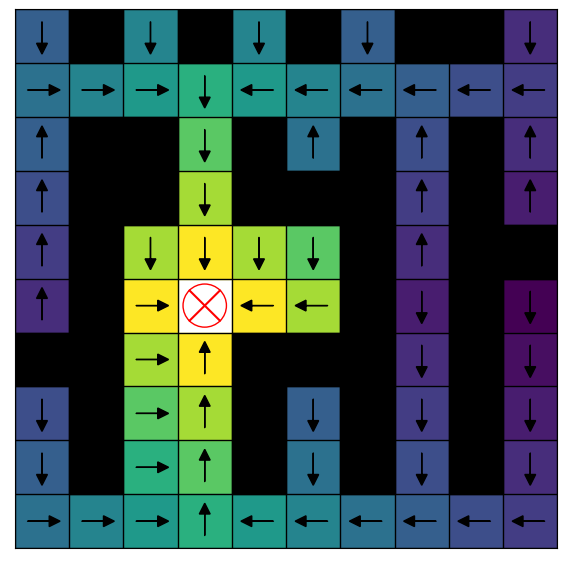

In [9]:
env = Labyrinth(10, 10, seed=0)
mdp = LabyrinthMDP()

t_r_dict, explored_states = mdp.build_mdp(env)
# len(explored_states)

gamma = 0.9
theta = 1e-6

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])

optimal_policy, optimal_value_function = find_optimal_policy(t_r_dict)

print("Optimal Policy:", optimal_policy)
print("Value Function:", optimal_value_function)

grid_shape = (env.rows, env.cols)
walls = set([tuple(cell) for cell in list(np.argwhere(env.maze.grid == 0))])
draw_gridworld(
    grid_shape,
    walls,
    optimal_value_function,
    env.maze.target_position,
    policy=optimal_policy,
    enable_heatmap=True,
)

### Plot each iteration

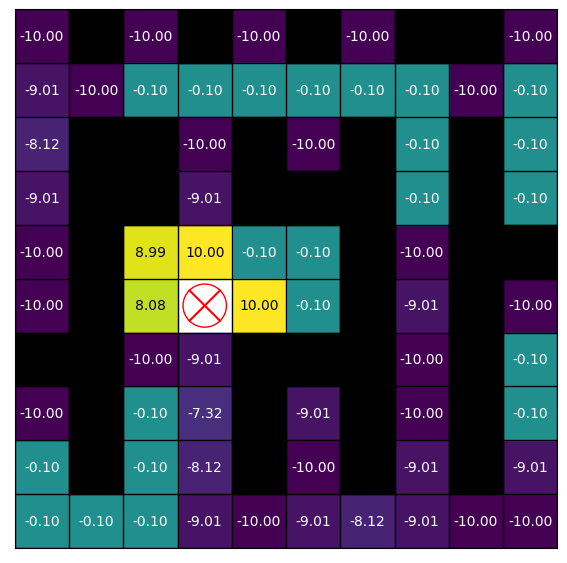

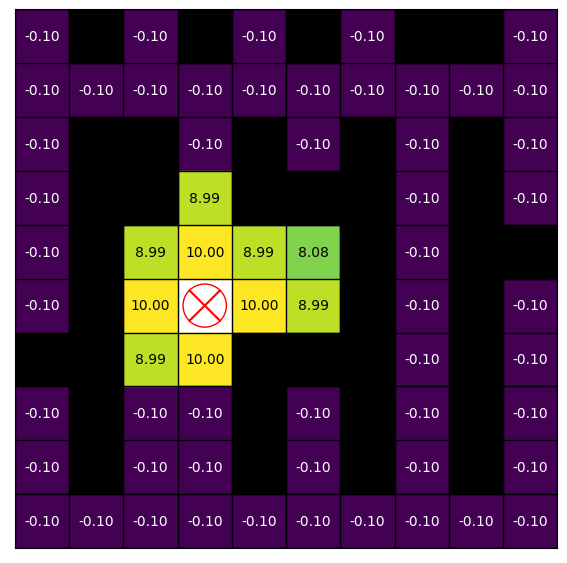

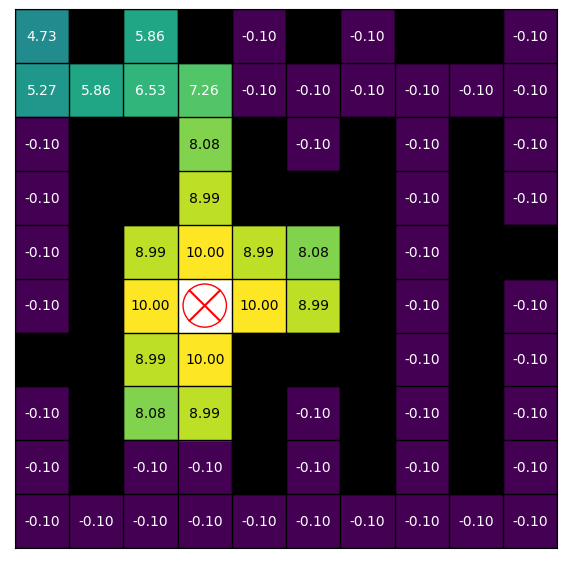

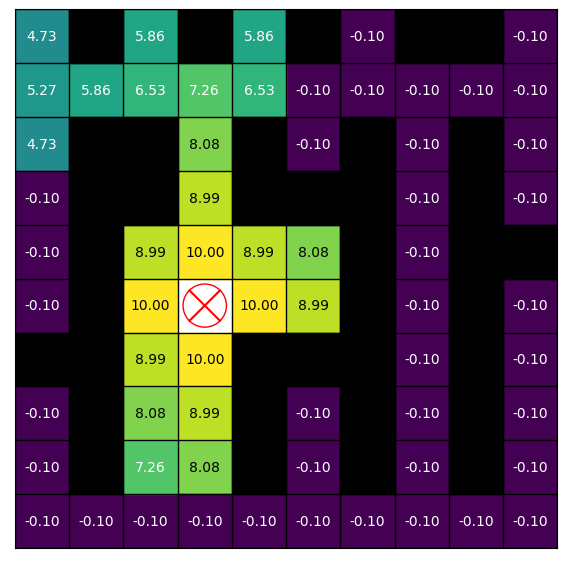

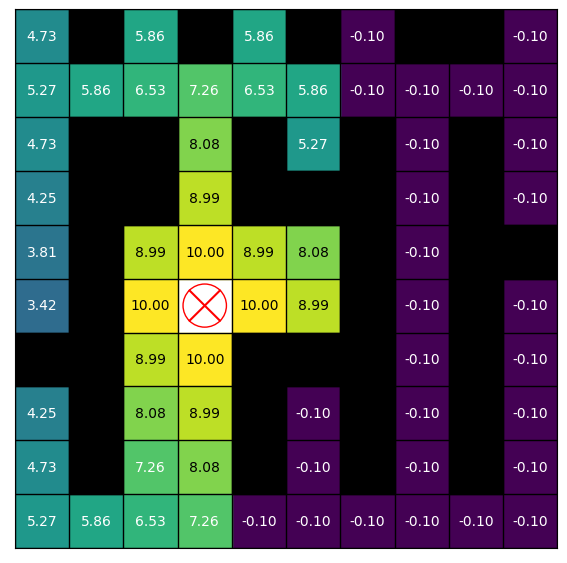

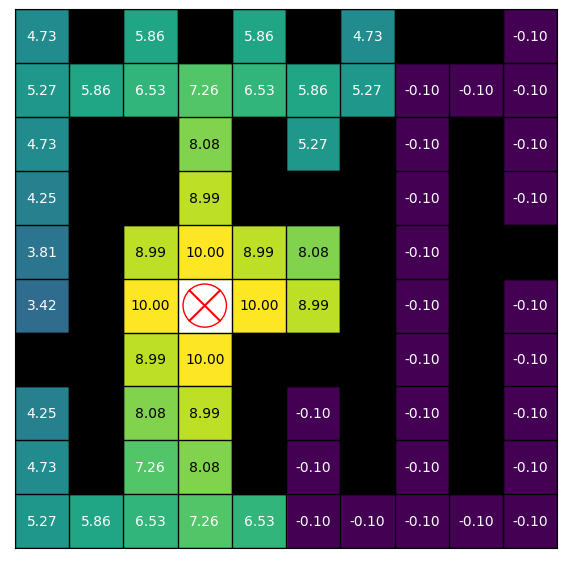

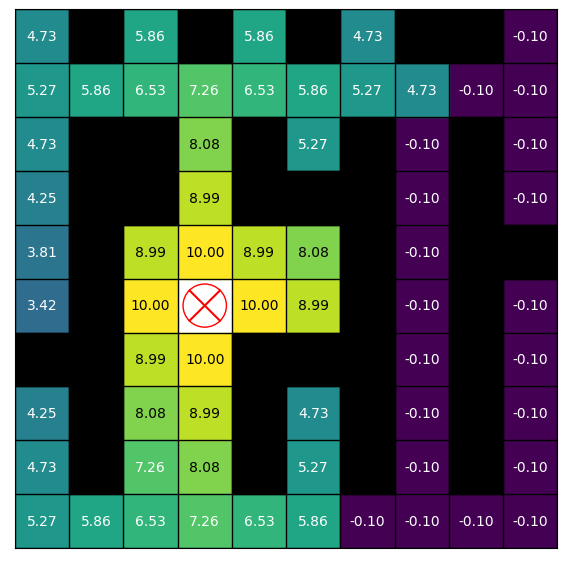

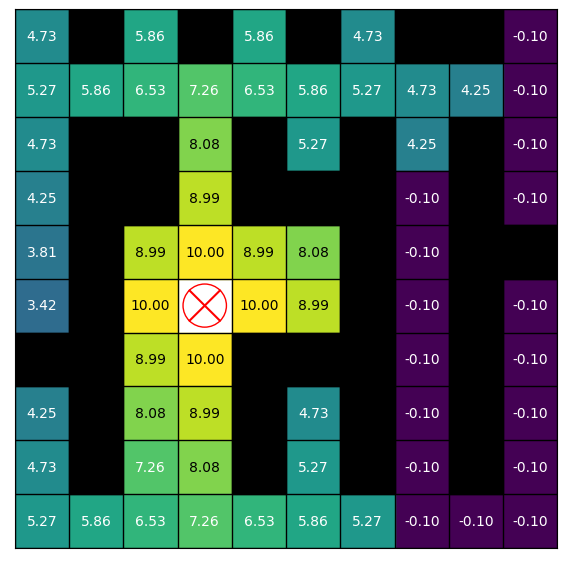

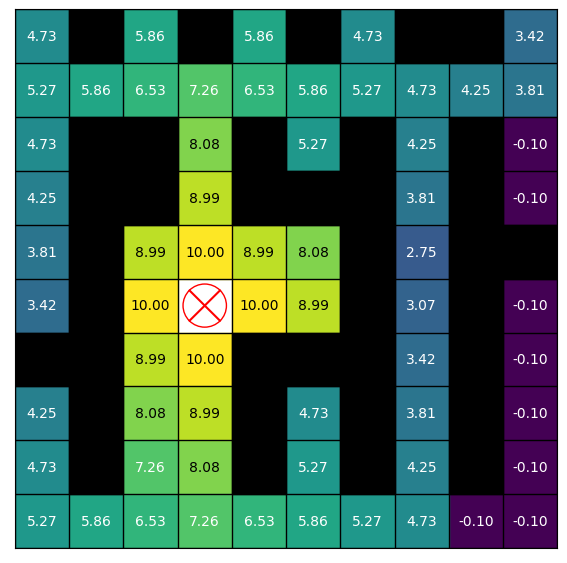

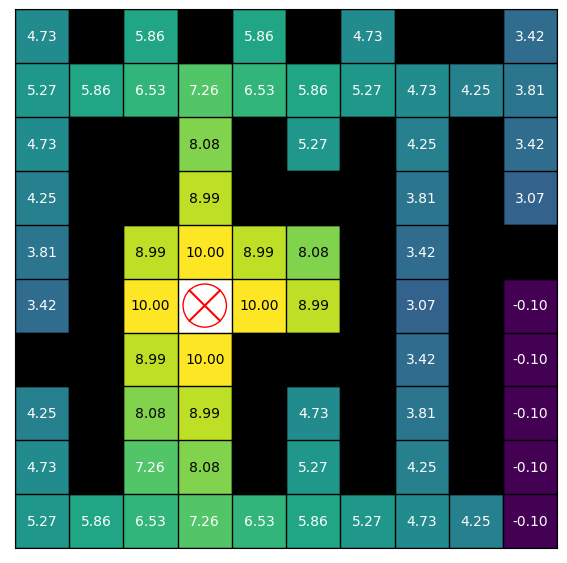

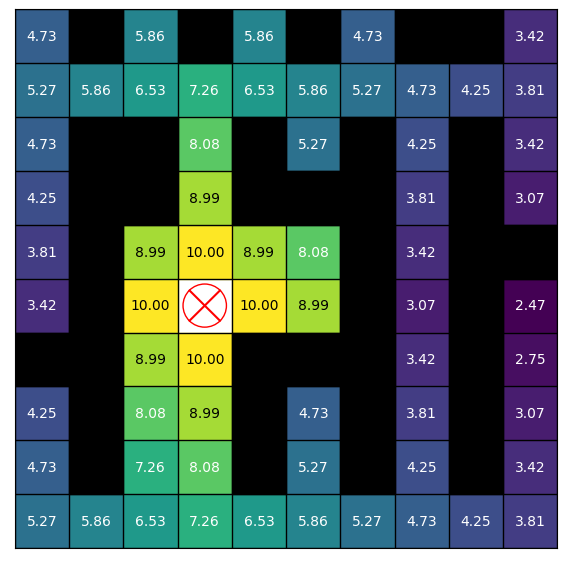

Policy Evaluation Iteration on Break 11


In [5]:
plot_steps = True
plot_every_k_iterations = 1

states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize value function and policy arbitrarily
V = {state: 0 for state in states}
policy = {state: np.random.choice(actions) for state in states}

iteration = 0
policy_stable = False
while not policy_stable:
    policy, V, policy_stable = policy_iteration(
        t_r_dict, policy, V, states, actions, gamma, theta
    )
    iteration += 1
    if plot_steps:
        if plot_every_k_iterations == 0 or iteration % plot_every_k_iterations == 0:
            draw_gridworld(
                grid_shape, walls, V, env.maze.target_position, enable_heatmap=True
            )
    if policy_stable:
        print("Policy Evaluation Iteration on Break", iteration)
        break


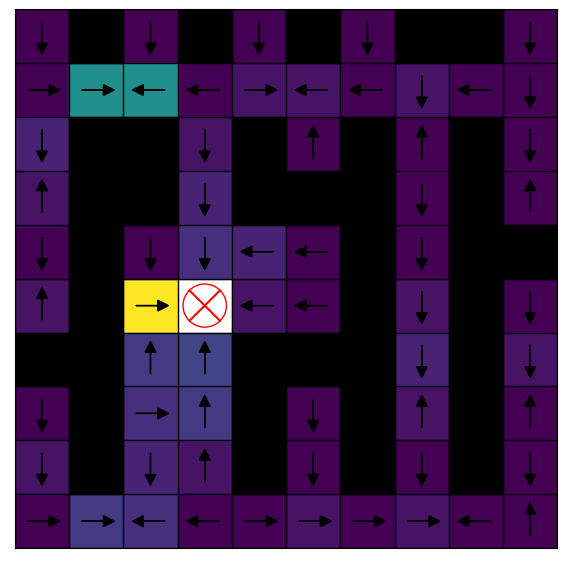

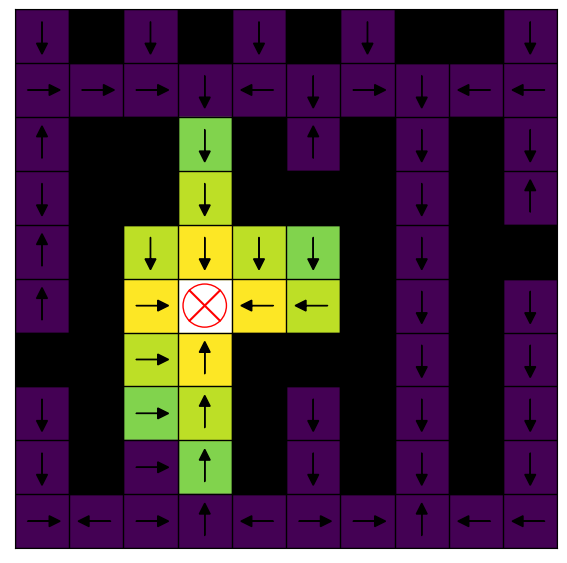

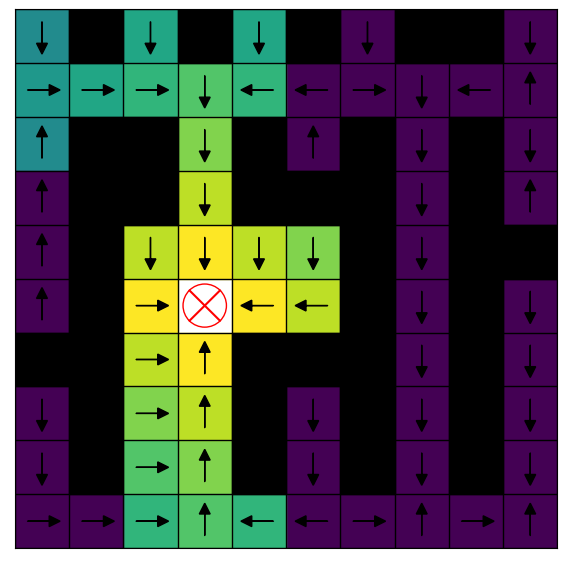

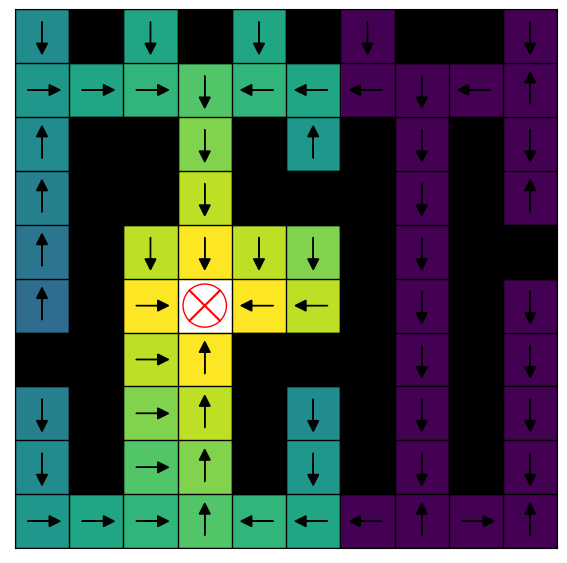

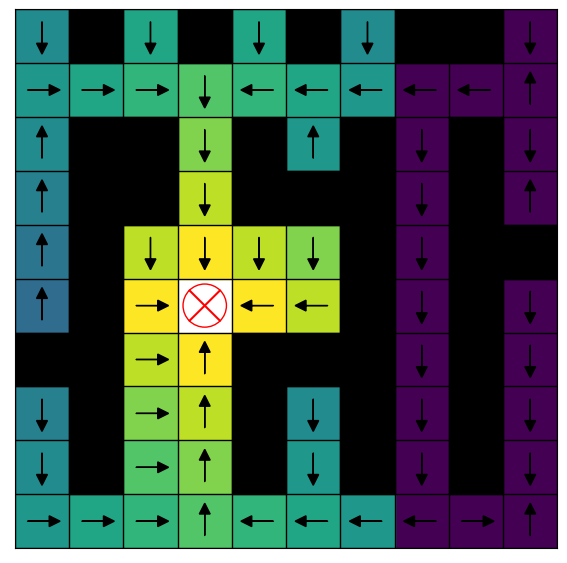

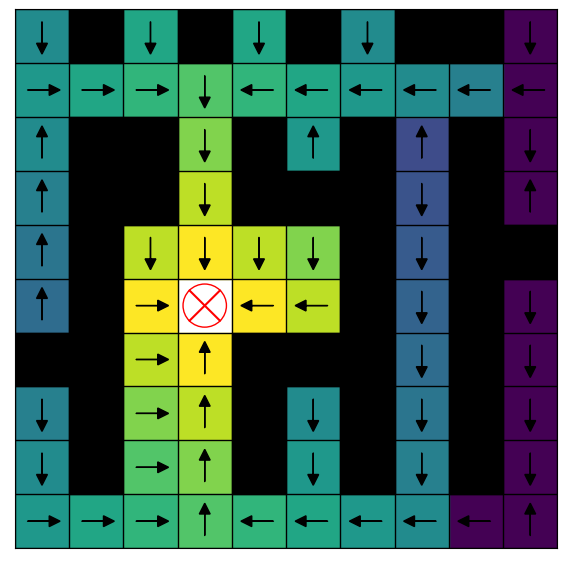

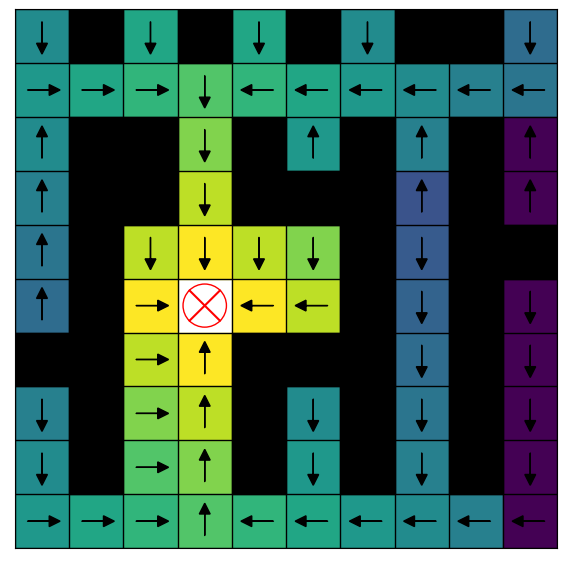

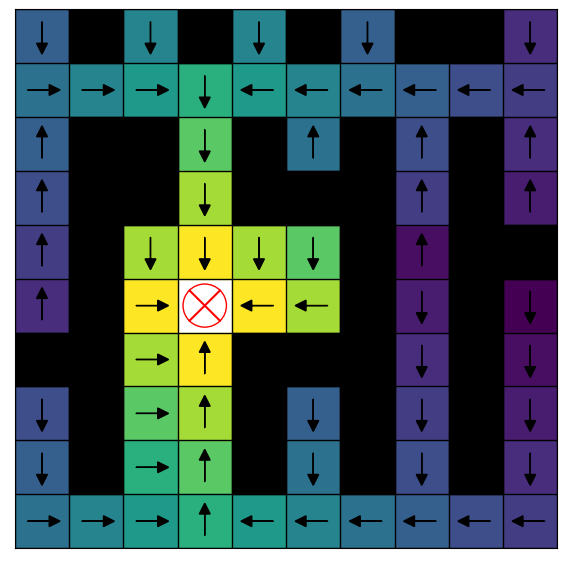

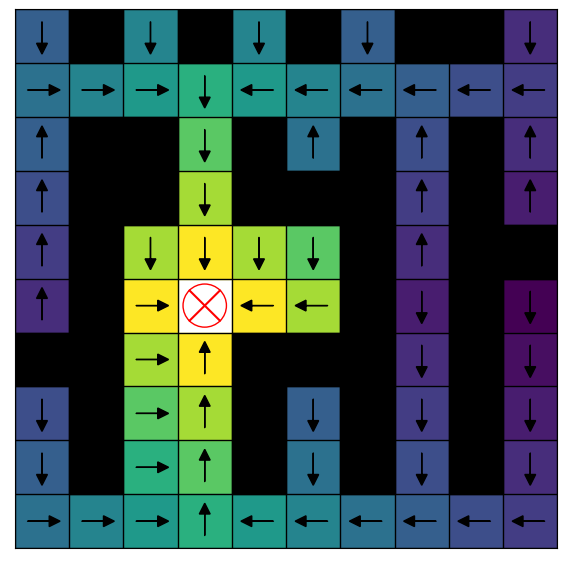

Policy Evaluation Iteration on Break 9


In [10]:
plot_steps = True
plot_every_k_iterations = 1

states = list(set([s for s, _ in t_r_dict.keys()]))
actions = list(set([a for _, a in t_r_dict.keys()]))

# Initialize value function and policy arbitrarily
V = {state: 0 for state in states}
policy = {state: np.random.choice(actions) for state in states}

iteration = 0
policy_stable = False
while not policy_stable:
    policy, V, policy_stable = policy_iteration(
        t_r_dict, policy, V, states, actions, gamma, theta
    )
    iteration += 1
    if plot_steps:
        if plot_every_k_iterations == 0 or iteration % plot_every_k_iterations == 0:
            draw_gridworld(
                grid_shape, walls, V, env.maze.target_position, policy=policy, enable_heatmap=True
            )
    if policy_stable:
        print("Policy Evaluation Iteration on Break", iteration)
        break
